<a href="https://colab.research.google.com/github/Angelaestefan/concentracion/blob/master/11_PCA_%5BPublic%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRINCIPAL COMPONENT ANALISYS (PCA)

Supongamos que la matriz de datos **X** es de dimensiones **num_observaciones** x **num_características**.

En este caso en particular, nosotros generamos datos sinteticos (datos ficticios) dada una distribucion normal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n_samples = 500
cov = [[3, 3, 1],
       [3, 4, 1],
       [1, 1, 1]]

X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov, size=n_samples)

print(f"Dimension del conjunto de datos generado: {X.shape}")

Dimension del conjunto de datos generado: (500, 3)


A manera de ejemplo, generamos datos de 3 dimensiones. De esta manera podemos generar el grafico de como se ven estos datos.

In [2]:
import plotly.graph_objects as go
import plotly.express as px

def plot_3D(X, Var_arrow=np.array([])):
  marker_data = go.Scatter3d(x=X[:,0],
                             y=X[:,1],
                             z=X[:,2],
                             mode='markers',
                             name="Data",
                             marker=dict(size=2,
                                         colorscale='Viridis',
                                         opacity=0.75))
  layout = go.Layout(title= '3-D Plane',
                     scene = dict(xaxis = dict(title  = "x"),
                                  yaxis = dict(title  = "y"),
                                  zaxis = dict(title  = "z")))

  arrow_data = []
  for i in range(Var_arrow.shape[0]):
    arrow_data.append(go.Scatter3d(x=[0, Var_arrow[i,0]],
                                    y=[0, Var_arrow[i,1]],
                                    z=[0, Var_arrow[i,2]],
                                    mode='lines',
                                    name=f"Componente {i+1}",
                                    line=dict(width=5)))

  fig=go.Figure(data=[marker_data, *arrow_data], layout=layout)

  fig.show()

In [3]:
plot_3D(X)

# ¿Cómo funciona el análisis de componentes principales (PCA)?

Como ya se ha mencionado, el **análisis de componentes principales** es un algoritmo de reducción de la dimensionalidad. Esto significa que reduce la dimensionalidad del espacio de características. Pero, **¿cómo consigue esta reducción?**

La motivación del algoritmo es que hay ciertas características que capturan un gran porcentaje de la varianza en el conjunto de datos original. Por eso es importante **encontrar las direcciones de máxima varianza en el conjunto de datos**. Estas direcciones se denominan componentes principales. **PCA** es esencialmente una proyección del conjunto de datos sobre los componentes principales.

# Realizar PCA en el conjunto de datos

Para encontrar los componentes principales, podemos utilizar la clase **PCA** del módulo de descomposición de **scikit-learn**.


Vamos a llamar a la funcion PCA pasando el número de componentes principales **n_components** deseados.


El número de componentes principales es el número de dimensiones que le gustaría reducir el espacio de características (dimensiones). Por el momento no buscamos reducir las dimensiones, sino ver todos sus los componentes. En este caso, son 3 componentes principales ya que los datos estan en 3 dimensiones.

In [4]:
from sklearn.decomposition import PCA

# Elegir el numero de componentes
pca = PCA(n_components=3).fit(X)

La instancia de PCA pca que hemos creado tiene varios atributos útiles que nos ayudan a entender lo que está pasando bajo el capó.

* El atributo **components_** almacena las direcciones de máxima varianza (los componentes principales).

Hemos mencionado que los componentes principales son direcciones de máxima varianza en el conjunto de datos. Pero, **¿cómo medimos la magnitud en esa dirección?**

* El atributo **explained_variance_** almacena las magnitud de varianza de los componentes principales.

In [5]:
print("Componentess con maxima varianza:")
for i,c in enumerate(pca.components_):
  print(f"Componente {i} = {c}")

print("\nMagnitud de varianza explicado por cada uno de los componentes seleccionados:")
for i,m in enumerate(pca.explained_variance_):
  print(f"Magnitud del componente {i} = {m}")

Componentess con maxima varianza:
Componente 0 = [0.63018722 0.74366634 0.2232139 ]
Componente 1 = [ 0.13002858 -0.38450311  0.91392009]
Componente 2 = [ 0.76547805 -0.54691657 -0.33900682]

Magnitud de varianza explicado por cada uno de los componentes seleccionados:
Magnitud del componente 0 = 6.881533478151871
Magnitud del componente 1 = 0.6982319620258853
Magnitud del componente 2 = 0.36861462526373084


De una manera mas simple, el atributo **explained_variance_ratio_** captura la proporción de la varianza total que captura cada componente principal. De esta manera se puede sumar los ratios para obtener la varianza total en el número elegido de componentes.

In [6]:
for i, n in enumerate(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)):
  print(f"componente {i}: {n}%")

componente 0: 86.58%
componente 1: 95.36%
componente 2: 100.0%


Aquí vemos que el **primer componente principal** captura el **86.16%** de la varianza de los datos, los primeros **dos componentes principales** juntos ccapturan el **94.43%** y los **tres componentes principales** capturan el **100%** de la varianza total del conjunto de datos.

---
Asi pues, podemos visualizar sobre los datos originales la direccion y magnitud de sus componentes principales, que muestran los ejes principales por los que se distribuyen los datos.

In [7]:
plot_3D(X, Var_arrow=np.dot(np.diag(pca.explained_variance_), pca.components_))

---
# Realizar PCA para reducir la dimension de los datos (ahora si)

Se puede llamar a la funcion **fit_transform()**, que realiza la funcion **fit()**, que ajusta el modelo con los datos X, seguido de la funcion **transform()**, que aplica la reducción de dimensionalidad a los datos X.

En este caso vamos a reducir la dimensionalidad de nuestros datos de 3-D a 2-D.

In [8]:
pca_red = PCA(n_components=2)

X_pca = pca_red.fit_transform(X)

print(f"Nuevas dimensiones de los datos: {X_pca.shape}")

Nuevas dimensiones de los datos: (500, 2)


In [9]:
print("Componentess con maxima varianza:")
for i,c in enumerate(pca_red.components_):
  print(f"Componente {i} = {c}")

Componentess con maxima varianza:
Componente 0 = [0.63018722 0.74366634 0.2232139 ]
Componente 1 = [ 0.13002858 -0.38450311  0.91392009]


In [10]:
print("\nMagnitud de varianza explicado por cada uno de los componentes seleccionados:")
for i,m in enumerate(pca_red.explained_variance_):
  print(f"Magnitud del componente {i} = {m}")


Magnitud de varianza explicado por cada uno de los componentes seleccionados:
Magnitud del componente 0 = 6.881533478151871
Magnitud del componente 1 = 0.6982319620258853


Dependiendo cuantos componentes principales elegimos (en estes caso, 2), podemos realizar una grafica que muestre nuestros datos reducidos en dimensionalidad.

In [11]:
def plot_2D(X, Var_arrow=np.array([])):
  plt.figure(figsize=(15,15))

  plt.scatter(X[:, 0], X[:, 1], alpha=0.75, label="data_reduced")

  for i in range(Var_arrow.shape[0]):
    plt.plot([0, Var_arrow[i,0]], [0, Var_arrow[i,1]],
             label=f"Component {i+1}",
             linewidth=3,
             color=f"C{i + 2}")

  plt.gca().set(aspect='equal',
                adjustable='box',
                title="2-D Plane",
                xlabel="x",
                ylabel="y",)
  plt.grid()
  plt.legend()
  plt.show()

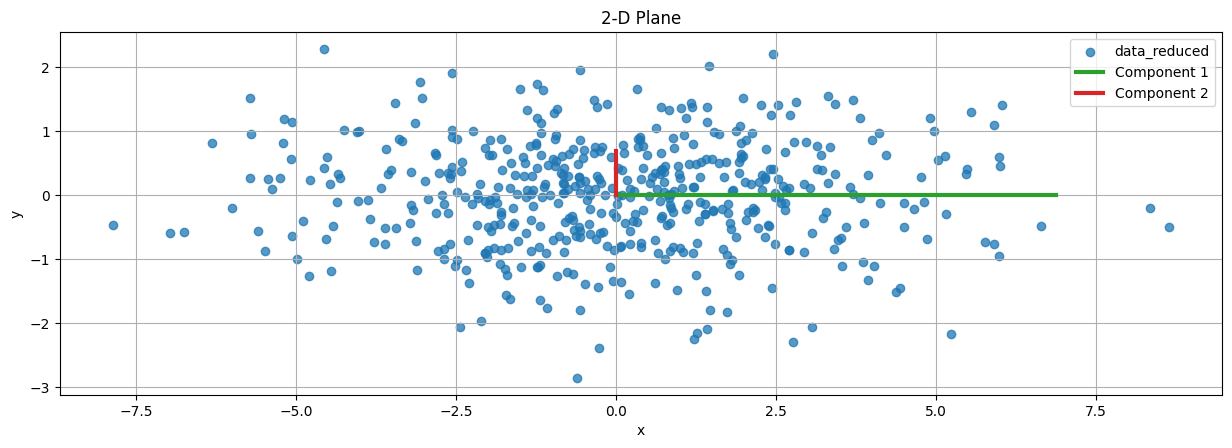

In [12]:
# Obtenemos los nuevos componentes de los datos ya transformados
pca_red = pca_red.fit(X_pca)

# Graficamos
plot_2D(X_pca, Var_arrow=np.dot(np.diag(pca_red.explained_variance_), pca_red.components_))

---
---

# EJERCIO: PCA & SVD

En este ejercicio se pide replicar los resultados obtenidos con nuestra implementacion de PCA de **`sklearn`**. Implementa manualmente el proceso para reducir a 2 dimensiones el conjunto de datos original 3D.

**Recordemos los datos originales:**

In [ ]:
N = X.shape
print(f"Dimensiones datos: {N}")
plot_3D(X)

* **Completa la funcion `SVD` para obtener los componentes originales y sus magnitudes (eigenvalores)**
* **Asegurate de realizar el preprocesamiento a los datos previo a la descomposicion**

In [ ]:
from scipy import linalg

def SVD(X):
  """
  Regresa la descomposicion de la matriz de covarianza de los datos originales X:
  componentes (eigenvectores) y sus magnitudes (eigenvalores).
  Args:
      X (np.ndarray): Matriz de características (n_samples, n_features).
  Returns:
      np.ndarray: componentes (n_features, n_features), magnitudes (n_features, ).
  """
  ###
  # Tu codigo va aqui

  pass
  ###

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui



*   **Utilizando las magnitudes de los componentes, muestra la proporción de la varianza total que captura cada componente principal. Expresalo en porcentajes.**
* Vale la pena preguntarse si los componentes ya vienen ordenamos de manera descendente.



In [ ]:
# Tu codigo va aqui

* **Nuevamente, utiliza las magnitudes y los componentes mismos para calcular los vectores de la varianza de los datos originales X. Utilizando la funcion `plot_3D`, grafica los datos originales X y los vectores de la varianza.**
* En la descomposición SVD, si $𝑞$ es un eigenvector asociado a un eigenvalor $𝜆$, entonces $−𝑞$ también lo es. Esto puede hacer que la direccion de los vectores de varianza difiera respecto a la implementacion de **`sklearn`**. Para eso, utiliza la funcion **`fix_signs`** para asegurarnos de tener los mismos signos. Asegurate de guarda la matriz de componentes arreglada en una variable aparte.

In [ ]:
def fix_signs(V, V_ref):
  """
  Regresa Matriz de componentes con signo arreglado respecto a la obtenida en la implementacion sklearn.
  Args:
      V (np.ndarray): Matriz de componentes (n_componentes, n_features).
      V_ref (np.ndarray): Matriz de componentes de implementacion sklearn (n_componentes, n_features).
  Returns:
      np.ndarray: Matriz de componentes con signo arreglado (n_componentes, n_features).
  """
  V_fixed = V.copy()
  for i in range(V.shape[0]):
    if np.sign(V_ref[i, i]) != np.sign(V_fixed[i, i]):
      V_fixed[i, :] *= -1
  return V_fixed

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui

* **Transforma los datos originales `X` con la matriz de componentes `V`. Para realizar la reduccion de dimensionalidad basta con omitir algunos componentes y quedarnos solo con los componentes (dimensiones) que deseamos. Aqui, queremos reducir la dimension de los datos de 3D a 2D.**
* Asegurate que al multiplicar $X$ y $V$ se tengan las dimensiones correctas.

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui

* Nuevamente aplica la funcion **`SVD`** para obtener los componentes y sus magnitudes de este nuevo conjunto de datos con dimensionalidad reducida. Nuevamente asegurate que los signos sean correctos usando la funcion **`fix_signs`**.
* Utiliza la funcion **`plot_2D`** para graficar los datos reducidos y sus respectivos vectores de la varianza.

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui

Notaras que las representaciones de los datos sean identica a los de la implementacion en **`sklearn`**.